In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
car=pd.read_csv('D:/Joy Wang/Weclouddata/PYTHON/used car/CAR DETAILS FROM CAR DEKHO.csv')

**1. read and understand data**

In [43]:
car.shape

(4340, 8)

*First glance at the data*

In [44]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [45]:
car.sample(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
827,Tata Indigo CR4,2013,170000,60000,Diesel,Individual,Manual,First Owner
2657,Tata Tiago 1.2 Revotron XE,2019,425000,3000,Petrol,Individual,Manual,First Owner
3075,Maruti Vitara Brezza ZDi Plus AMT,2018,800000,30000,Diesel,Individual,Automatic,Second Owner
2250,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner
3400,Maruti Swift Dzire ZXI,2016,620000,35000,Petrol,Individual,Manual,First Owner
1917,Tata Indica Vista Aqua TDI BSIII,2009,150000,30000,Diesel,Individual,Manual,First Owner
1099,Honda City i DTEC VX,2014,520000,110000,Diesel,Individual,Manual,First Owner
1944,Tata Indigo LX,2012,130000,90000,Diesel,Individual,Manual,Second Owner
3380,Volkswagen Polo Diesel Trendline 1.2L,2011,350000,110000,Diesel,Individual,Manual,First Owner
1795,Ford Ecosport 1.5 Petrol Titanium Plus,2019,1100000,5166,Petrol,Dealer,Manual,Test Drive Car


**At first glance -- names of the cars are very long.**

*Looking at the data types*

In [46]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


**Car name, fuel, seller, transmission and owner are catagorical fields.** 
**Also with the above output there might not be any missing values, let's check**

In [47]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**No null values**

**Basic EDA**

**check each catagory**

In [3]:
print(car['fuel'].unique())
print(car['seller_type'].unique())
print(car['transmission'].unique())
print(car['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


**checking value distribution**

<AxesSubplot:xlabel='fuel', ylabel='count'>

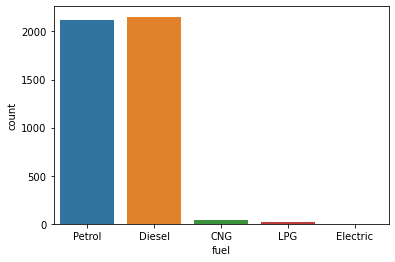

In [4]:
sns.countplot(x="fuel",data=car)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

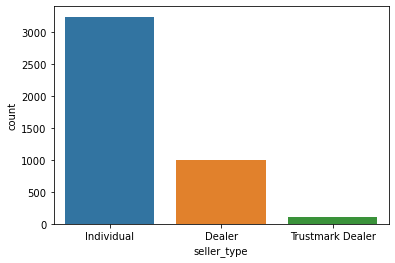

In [5]:
sns.countplot(x="seller_type",data=car)

<AxesSubplot:xlabel='transmission', ylabel='count'>

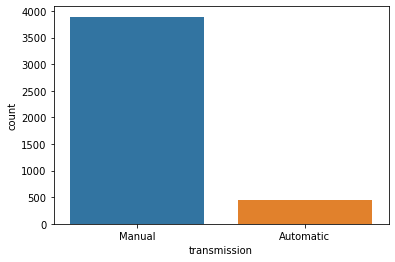

In [6]:
sns.countplot(x="transmission",data=car)

<AxesSubplot:xlabel='owner', ylabel='count'>

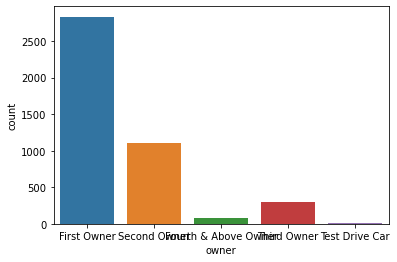

In [7]:
sns.countplot(x="owner",data=car)

**2.1 Prepare Data - Create field 'Age of Car'<br> - Create selling price in CAD** 

In [13]:
car['current year']=2020

In [14]:
car['age_of_car']=car['current year']-car['year']

In [9]:
# change currency to CAD
price_in_CAD=car['selling_price']/61
print(price_in_CAD)

0         983.606557
1        2213.114754
2        9836.065574
3        4098.360656
4        7377.049180
            ...     
4335     6721.295082
4336     6721.295082
4337     1803.278689
4338    14180.327869
4339     3688.524590
Name: selling_price, Length: 4340, dtype: float64


In [11]:
car['sellingprice_CAD']=price_in_CAD
print(car['sellingprice_CAD'])

0         983.606557
1        2213.114754
2        9836.065574
3        4098.360656
4        7377.049180
            ...     
4335     6721.295082
4336     6721.295082
4337     1803.278689
4338    14180.327869
4339     3688.524590
Name: sellingprice_CAD, Length: 4340, dtype: float64


In [12]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,sellingprice_CAD
0,Maruti 800 AC,2007,983.606557,70000,Petrol,Individual,Manual,First Owner,983.606557
1,Maruti Wagon R LXI Minor,2007,2213.114754,50000,Petrol,Individual,Manual,First Owner,2213.114754
2,Hyundai Verna 1.6 SX,2012,9836.065574,100000,Diesel,Individual,Manual,First Owner,9836.065574
3,Datsun RediGO T Option,2017,4098.360656,46000,Petrol,Individual,Manual,First Owner,4098.360656
4,Honda Amaze VX i-DTEC,2014,7377.049180,141000,Diesel,Individual,Manual,Second Owner,7377.049180


**2.2 Prepare Data - Drop 'name': is not considered as a contributor in this case <br>- Drop 'year','current year','selling_price': unnecessary**

In [15]:
car.drop(['name','year','current year','selling_price'],axis=1,inplace=True)

**2.3 Prepare Data - Onehot-coding**

In [16]:
car1=pd.get_dummies(car,drop_first=True)

In [17]:
car1.describe()
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     4340 non-null   int64  
 1   sellingprice_CAD              4340 non-null   float64
 2   age_of_car                    4340 non-null   int64  
 3   fuel_Diesel                   4340 non-null   uint8  
 4   fuel_Electric                 4340 non-null   uint8  
 5   fuel_LPG                      4340 non-null   uint8  
 6   fuel_Petrol                   4340 non-null   uint8  
 7   seller_type_Individual        4340 non-null   uint8  
 8   seller_type_Trustmark Dealer  4340 non-null   uint8  
 9   transmission_Manual           4340 non-null   uint8  
 10  owner_Fourth & Above Owner    4340 non-null   uint8  
 11  owner_Second Owner            4340 non-null   uint8  
 12  owner_Test Drive Car          4340 non-null   uint8  
 13  own

In [56]:
car1.head()

,selling_price,km_driven,age_of_car,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


**3. Looking for correlations**

In [18]:
car1.corr()

,km_driven,sellingprice_CAD,age_of_car,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
km_driven,1.000000,-0.192289,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
sellingprice_CAD,-0.192289,1.000000,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
age_of_car,0.419688,-0.413922,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.285396,0.282947,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.001372,-0.005095,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,0.036652,-0.042434,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.291139,-0.269453,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,0.182663,-0.236798,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,-0.089858,0.110176,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,0.120226,-0.530205,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


*Visualizing*

In [58]:
import seaborn as sns

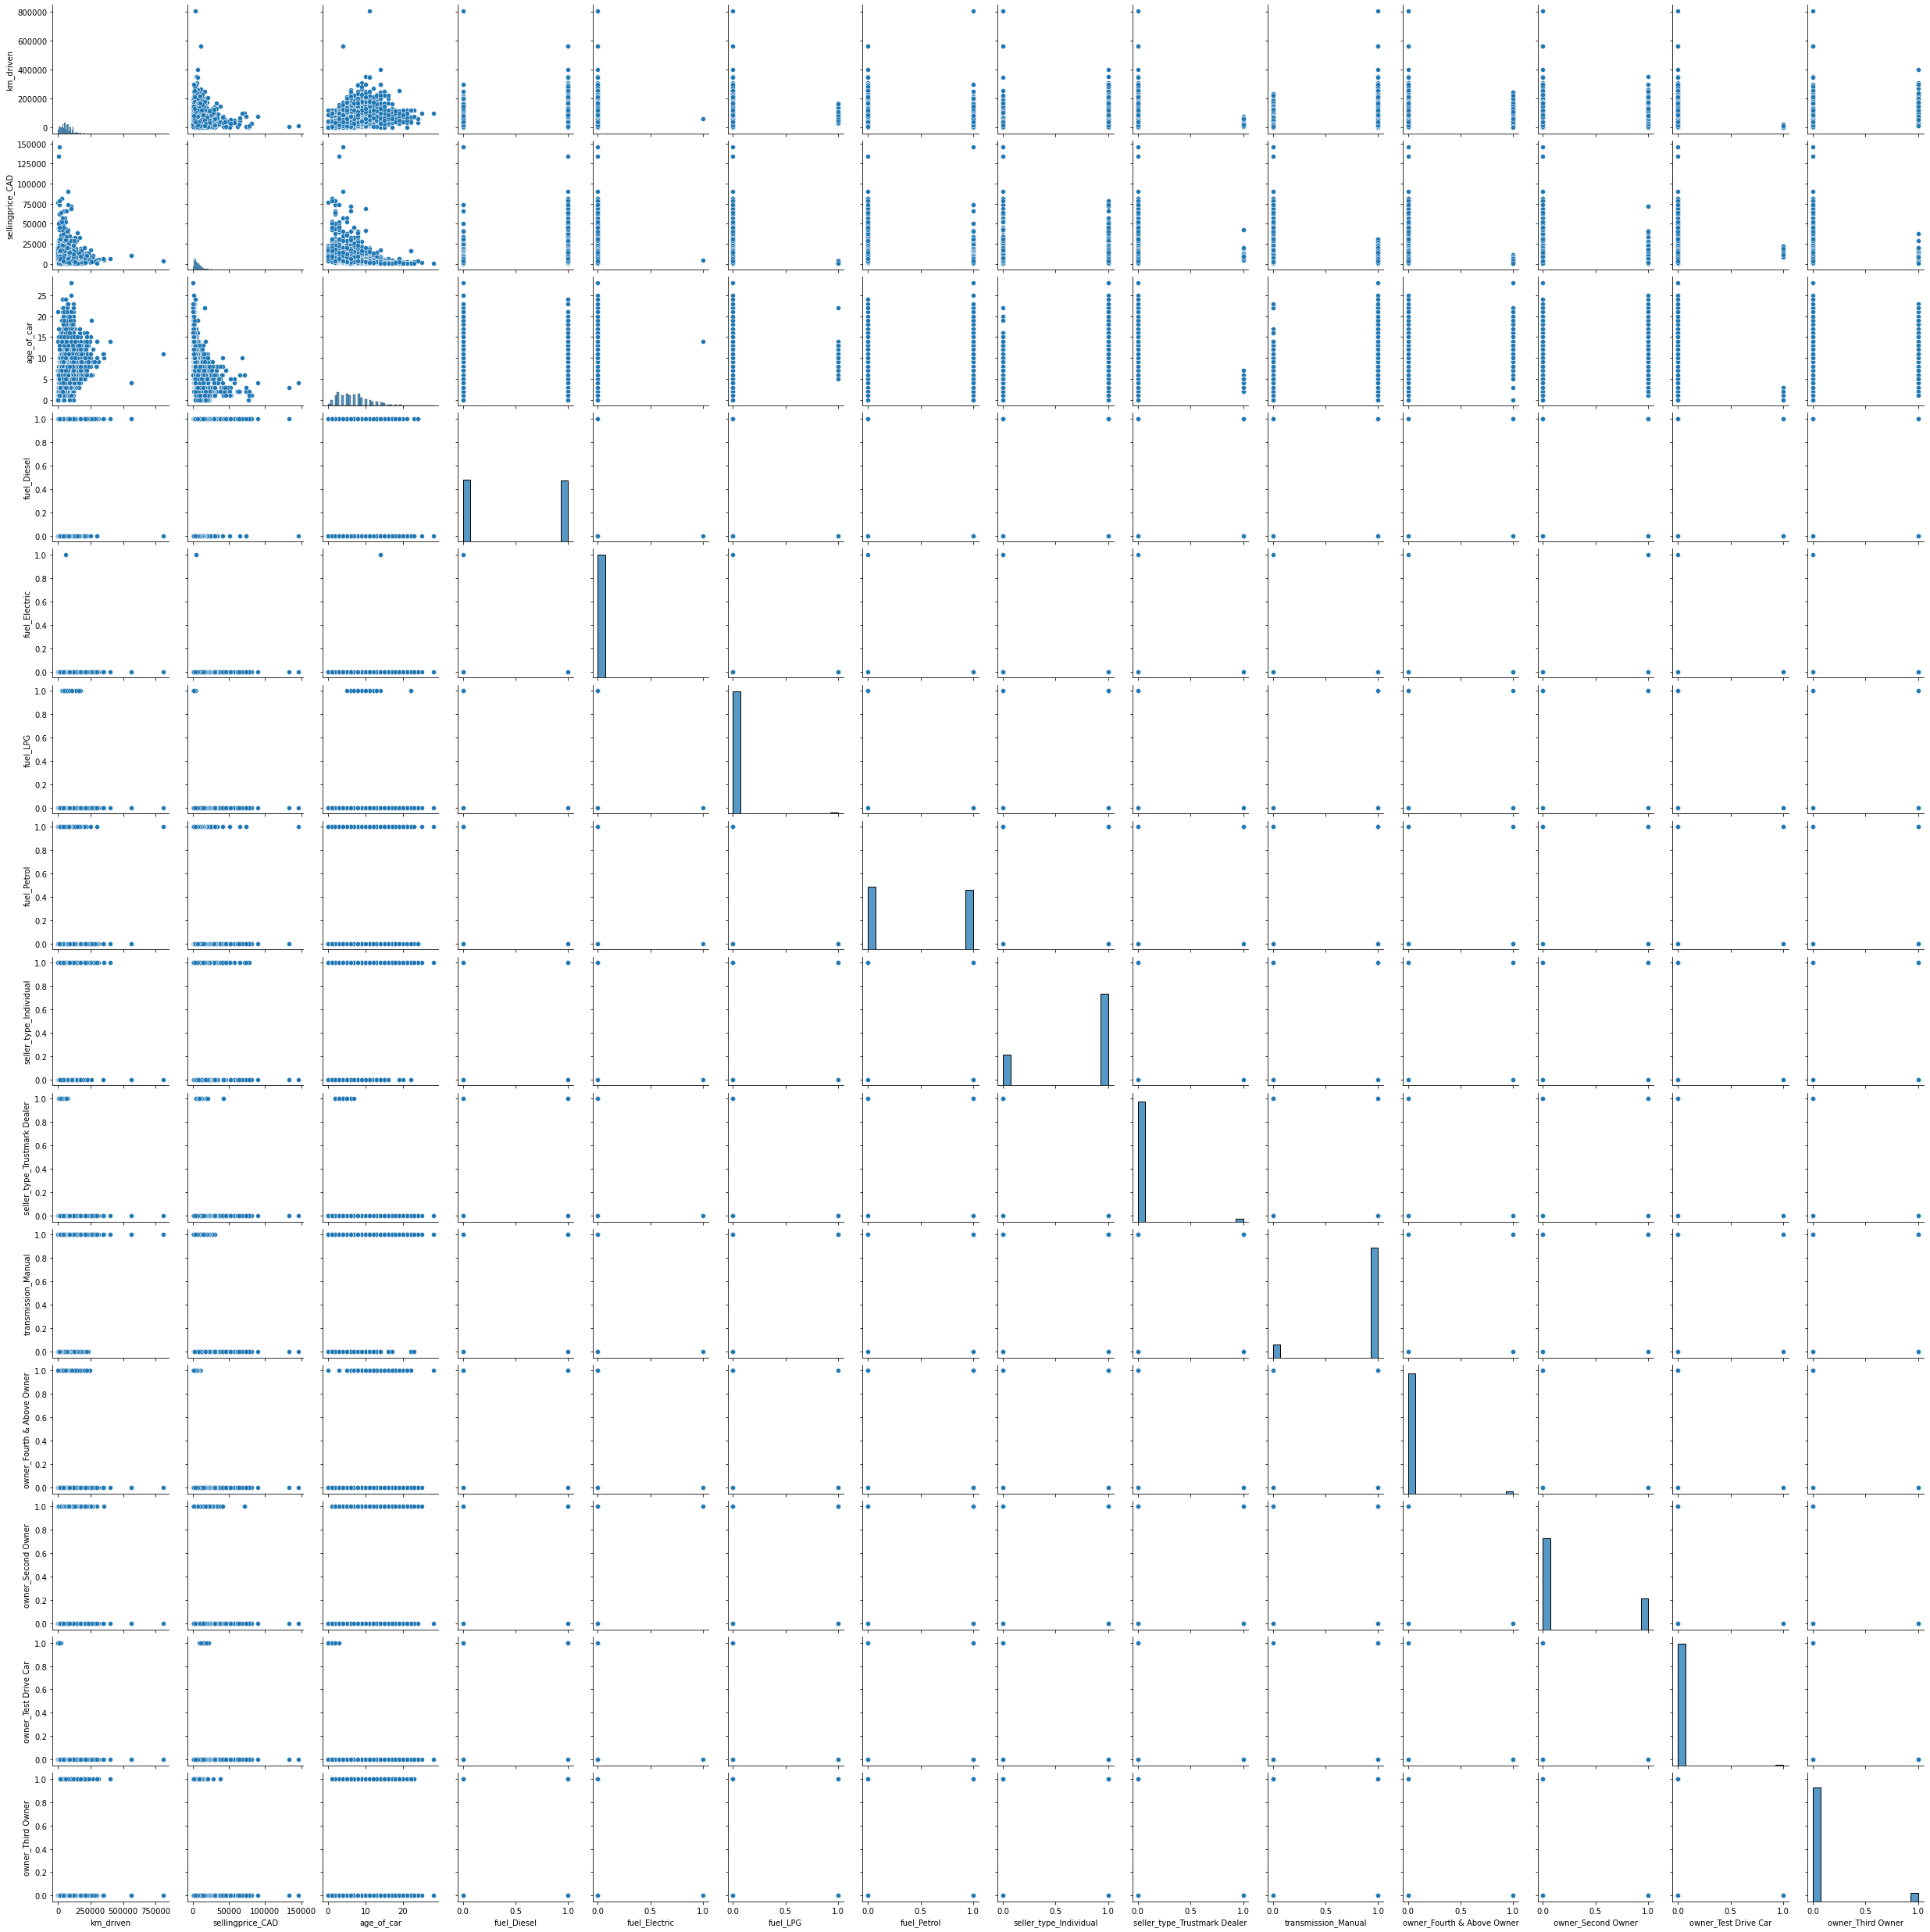

In [19]:
sns.pairplot(car1)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

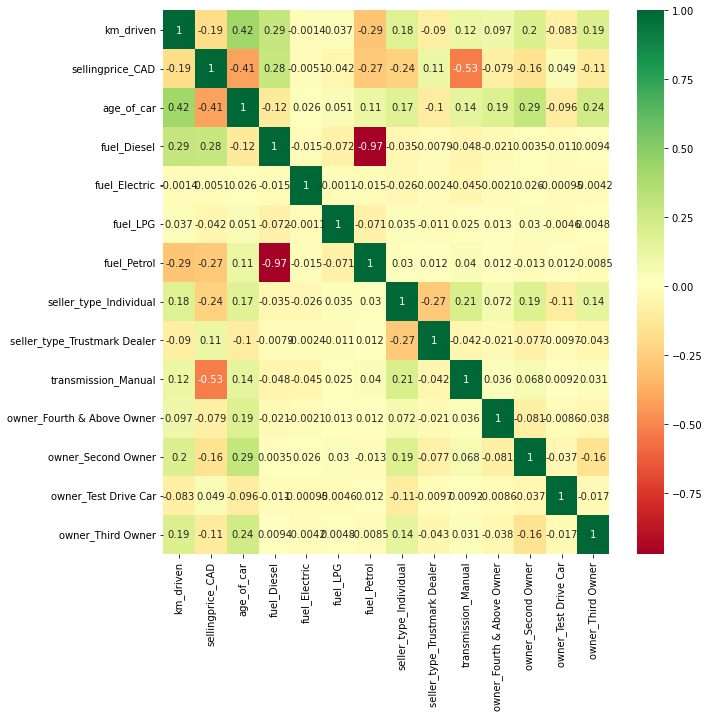

In [20]:
#get correlations of each features in dataset
corrmat = car1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(car1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
x=car1.loc[:,car1.columns != 'sellingprice_CAD'] # independent features: all variables except selling price
y=car1.iloc[:,1] # dependent feature: selling price

In [30]:
x.head()

,km_driven,age_of_car,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [31]:
y.head()

0     983.606557
1    2213.114754
2    9836.065574
3    4098.360656
4    7377.049180
Name: sellingprice_CAD, dtype: float64

**4. Feature Importance** 

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[2.43631445e-01 2.48204976e-01 1.30352008e-01 1.57147246e-05
 2.56218279e-05 2.65855294e-04 4.72477152e-02 8.93602240e-03
 2.92833497e-01 8.62297065e-04 2.28360265e-02 5.16764009e-04
 4.27205655e-03]


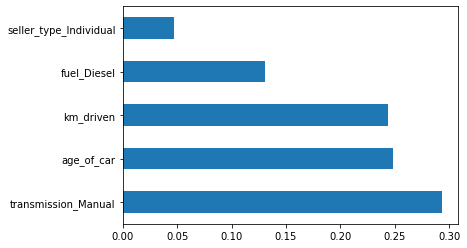

In [35]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

**split and load data**

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [38]:
x_train.shape

(3472, 13)

**Hyperperameter stunning**

In [43]:
# load a regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [70]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
### Build hyperperameters range

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Load the random search
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Randomized Search CV
# Define the RandomizedSearchCV to find the best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [47]:
# fit the model for search model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
# get the best hyperperameters from random search
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [49]:
rf_random.best_score_

-33726098.74992354

In [ ]:
# Optional -- Grid search after random search based on the best we got

In [50]:
# Use the random forest regressor model (with best hyperparameters) to predict the testing data
predictions=rf_random.predict(x_test)

In [51]:
predictions

array([17476.12019323, 24438.15590317,  3700.13456188, 64789.23748681,
        3753.44508818,  2579.25211032, 14555.93214064,  4816.88886807,
       21608.97146689,  7231.86306054,  4562.14535554,  6845.42592952,
       11912.93826226,  9049.64504052,  2789.44720056, 11336.62245288,
        7459.03103011,  4406.40525575,  1856.86694834,  9206.89370945,
        1510.53395474,  8397.60797222,  6725.85887241,  6719.59295091,
       14881.47675487, 10769.15173784, 10491.45618578,  8378.09974134,
        9838.24937597,  6723.07725134,  6191.75052994,  7824.98269665,
        7476.03179973, 12394.17376784,  4718.93640771,  6944.03665532,
        5362.05351382,  1786.23114648,  3701.18762706,  6465.73721627,
        3108.12678587,  8464.08825137,  9868.33381496, 30308.92611559,
        7095.96194296,  4475.80316021,  1898.13652127,  6213.62488393,
        8649.7886179 ,  5585.44678523,  2991.21452034,  6450.1076592 ,
        5462.34474065, 17180.06994308,  7961.21082826,  9155.30832373,
      

<AxesSubplot:xlabel='sellingprice_CAD', ylabel='Density'>

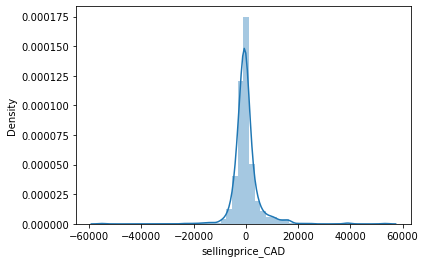

In [54]:
sns.distplot(y_test-predictions)

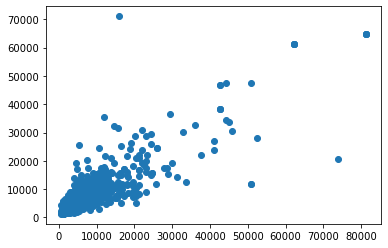

In [55]:
plt.scatter(y_test,predictions)

In [60]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2825.3630159537474
MSE: 27688774.982607592
RMSE: 5262.012446071141


In [85]:
#import pickle
# open a file, where you ant to store the data
# with open('random_forest_regression_model.pkl', 'wb') as f:
# dump information to that file
#    pickle.dump(rf_random, f)